In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

Dir = 'PetImages'
CATEGORIES = ["Dog", "Cat"]
for c in CATEGORIES:
    path = os.path.join(Dir, c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()

        break
    break



<Figure size 640x480 with 1 Axes>

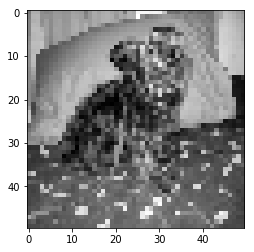

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 12501/12501 [02:37<00:00, 79.28it/s]


24946


In [2]:
img_size = 50
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap ='gray')
plt.show()

training_data = []

# cc = 0
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(Dir,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
#             print("count:" + str(cc))
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (img_size,img_size))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

In [3]:
import random
random.shuffle(training_data)
# for sample in training_data:
#     print(sample[1])

In [4]:
X=[] # X has to be a numpy array
y=[]
for feature, label in training_data:
    X.append(feature)
    y.append(label)
X=np.array(X).reshape(-1, img_size, img_size, 1) # 1=grayscale

In [6]:
# Save the data, can also do numpy.save()...
import pickle
pickle_out = open("x.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X= pickle.load(pickle_in)

In [7]:
X[1]

array([[[101],
        [104],
        [105],
        ...,
        [ 95],
        [ 61],
        [ 86]],

       [[103],
        [109],
        [111],
        ...,
        [ 96],
        [ 57],
        [ 87]],

       [[105],
        [107],
        [110],
        ...,
        [ 98],
        [ 63],
        [ 91]],

       ...,

       [[145],
        [129],
        [130],
        ...,
        [ 31],
        [107],
        [ 47]],

       [[110],
        [ 46],
        [120],
        ...,
        [ 36],
        [ 78],
        [ 42]],

       [[ 58],
        [111],
        [111],
        ...,
        [ 52],
        [ 40],
        [ 60]]], dtype=uint8)